In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
dataframe = pd.read_csv("Mall_Customers.csv")

In [15]:
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
dataframe.shape

(200, 5)

<h3> Univariante Analysisis </h3>

In [4]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


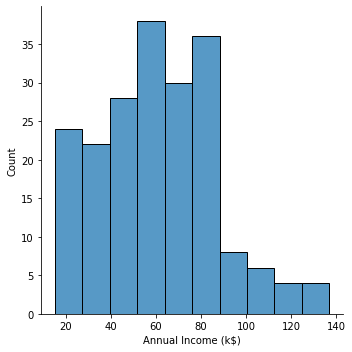

In [5]:
sns.displot(dataframe['Annual Income (k$)'])

In [ ]:
dataframe.columns


<Figure size 432x288 with 0 Axes>

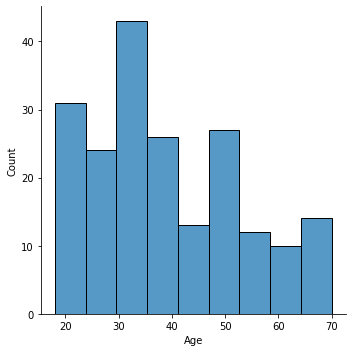

<Figure size 432x288 with 0 Axes>

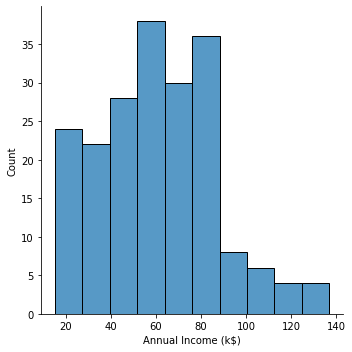

<Figure size 432x288 with 0 Axes>

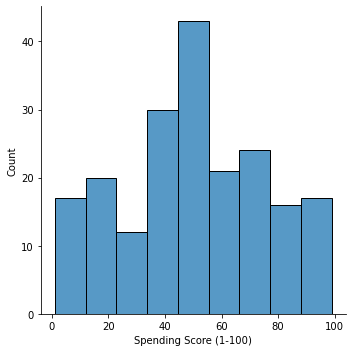

In [7]:
col=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.displot(dataframe[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

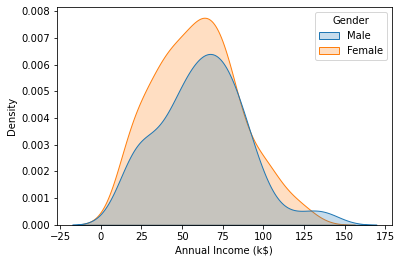

In [8]:
sns.kdeplot(dataframe['Annual Income (k$)'],
            shade=True,
            hue=dataframe['Gender']
            )


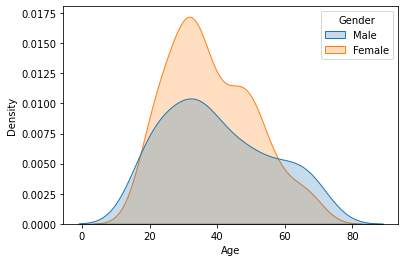

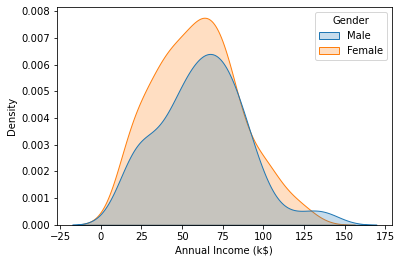

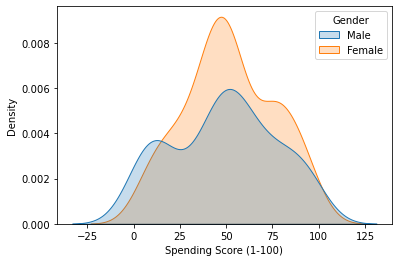

In [9]:
for i in col:
    plt.figure()
    sns.kdeplot(dataframe[i],
            shade=True,
            hue=dataframe['Gender']
            )


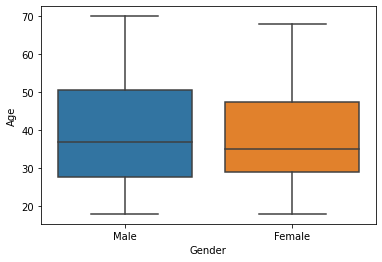

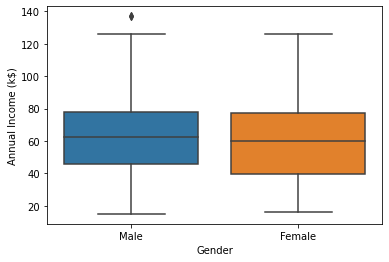

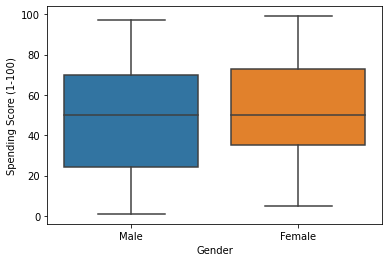

In [10]:
for i in col:
    plt.figure()
    sns.boxplot(data=dataframe,
            x='Gender',
            y=dataframe[i]
            )

In [ ]:
dataframe['Gender'].value_counts()

**Females 112** </br>
**Males 88**

In [ ]:
dataframe['Gender'].value_counts(normalize=True)
# in %

**Female = 56%** </br>
**Male = 44%**

<h3>Bivariante Analysis</h3>

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

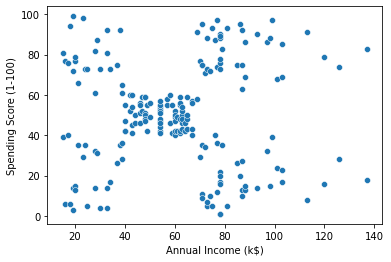

In [13]:
sns.scatterplot(data=dataframe, x="Annual Income (k$)", y='Spending Score (1-100)')

In [ ]:
#dataframe = dataframe.drop('CustomerID', axis=1)
sns.pairplot(dataframe,hue='Gender')


In [ ]:
dataframe.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

In [16]:
dataframe.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
sns.heatmap(dataframe.corr(),annot=True,cmap="coolwarm")

<h3> Clustering  Univariante, Bivariante, Multivariante  </h3>

In [18]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(dataframe[['Annual Income (k$)']])


KMeans(n_clusters=3)

In [19]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [20]:
dataframe['income cluster'] = clustering1.labels_


In [21]:
dataframe['income cluster'].value_counts()

0    90
2    74
1    36
Name: income cluster, dtype: int64

In [22]:
clustering1.inertia_
#distance between the centroides
#elbo method is use to find how many clusters we should  use in n_cluster

23517.330930930937

In [ ]:
inartiaScores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataframe[['Annual Income (k$)']])
    inartiaScores.append(kmeans.inertia_)

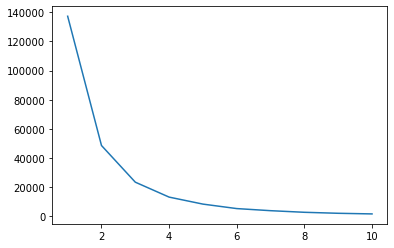

In [24]:
plt.plot(range(1,11),inartiaScores)

In [ ]:
dataframe.groupby('income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<h4> Bivariante cluster </h4>

In [28]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(dataframe[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
dataframe['Spending and Income Cluster'] = clustering2.labels_
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


In [ ]:
inartiaScores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(dataframe[['Annual Income (k$)', 'Spending Score (1-100)']])
    inartiaScores2.append(kmeans2.inertia_)

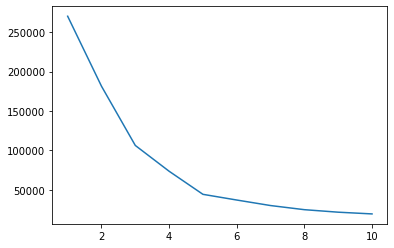

In [32]:
plt.plot(range(1,11),inartiaScores2)

In [39]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

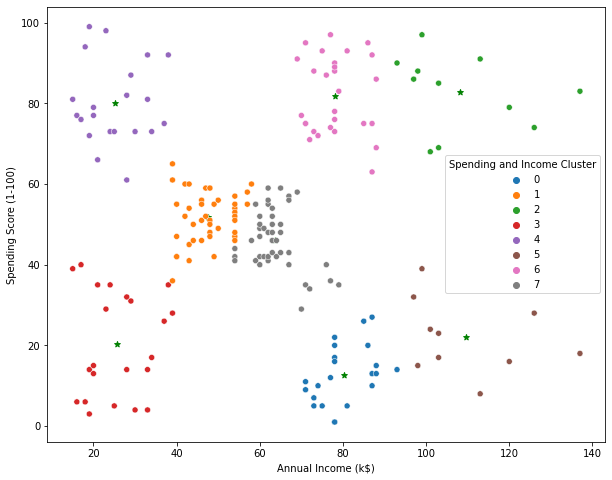

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],c='green', marker='*')
sns.scatterplot(data=dataframe, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10'
                )

In [84]:
pd.crosstab(dataframe['Spending and Income Cluster'],dataframe['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.318182,0.681818
1,0.581395,0.418605
2,0.545455,0.454545
3,0.636364,0.363636
4,0.571429,0.428571
5,0.700000,0.300000
6,0.535714,0.464286
7,0.604651,0.395349


<h1>Results for selecting which profiles to target for the next campaign</h1>

**Cluster 6** is characterized by a high annual income and a high spending score. This group consists of **53.57% women** and **46.42% men**.

The next best group for a campaign would be **Cluster 4**, which consists of **young adults with a low annual income** but high spending score.

**Clusters 1 and 7** represent the median, where most buyers are concentrated. **Cluster 7** consists of **60.04% women**, while **Cluster 1** consists of **58.13% women**.

**Median Female customer : 38**
**Median Male customer : 39**


In [ ]:
dataframe.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<h1> Multivariate clustering </h1>

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
scale = StandardScaler()

In [65]:
dff = pd.get_dummies(dataframe, drop_first=True)

In [66]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [67]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [68]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [69]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [71]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [ ]:
inartiaScores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inartiaScores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inartiaScores3)